# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

This project was inspired from [here](https://github.com/bleso-a/Data-Analysis-Project). Original copy [here](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files.

In [3]:
import os
import pandas as pd
import glob

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta, date

#### Use glob to match the pattern "csv" and combine all the files in the generated list above and export to a CSV.

In [5]:
source_files = glob.glob('/Users/toluxxxx/Downloads/Data-Analysis-Project-main/*.csv')
dataframes_csv = []

for file in source_files:
    df = pd.read_csv(file)
    dataframes_csv.append(df)
xyz= pd.concat(dataframes_csv,ignore_index=True)

xyz.to_csv('Company XYZ')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. 

In [7]:
xyz.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### Check the number of rows and columns present.

In [8]:
xyz.shape

(1000, 17)

#### Generate the names of the columns.

In [9]:
xyz.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### Statiscal Summary
The describe method provides the data statistical summary for the dataset.

In [10]:
xyz.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


####  Missing values

In [11]:
xyz.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### Data Information

In [12]:
xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

####  Use `to_datetime()` to convert the `date` column to `datetime`

In [13]:
xyz['Date']= pd.to_datetime(xyz['Date'])

#### Check the datatype to confirm if it's in `datetime`

In [14]:
xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

#### Repeat the two steps above to the `time` column

In [15]:
xyz['Time']= pd.to_datetime(xyz['Time'])

## Extract Features from date & time

#### Extract the Day feature from the `Date` column, and save to a new `Day` column

In [16]:
xyz['Day'] = xyz['Date'].dt.day

#### Extract the Month feature from the `Date` column, and save to a new `Month` column

In [17]:
xyz['Month'] = xyz['Date'].dt.month

#### Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [18]:
xyz['Year'] = xyz['Date'].dt.year

#### Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [19]:
xyz['Hour'] = xyz['Time'].dt.hour

In [20]:
xyz.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2021-09-12 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2021-09-12 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2021-09-12 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2021-09-12 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2021-09-12 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


####  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [21]:
xyz['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20])

In [22]:
xyz['Hour'].nunique()

11

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [23]:
cat_col = [col for col in xyz.columns if xyz[col].dtype == 'object']
cat_col

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).

In [24]:
#Example - Uncomment the Code and Run it
xyz['Branch'].unique().tolist()

['B', 'C', 'A']

In [25]:
print("Total Number of unique values in the Branch Column : {}". format(len(xyz['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


####  `value_counts()` function is used to get a Series containing counts of unique values. 

In [26]:
xyz['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [27]:
xyz['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

## Step 5 - Aggregration with GroupBy

In [28]:
xyz.groupby('City').sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Abuja,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,5068,665,670308,5029
Lagos,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,5232,688,686460,4987
Port Harcourt,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,4956,640,662232,4894


In [29]:
xyz.groupby('City').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Abuja,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,15.265060,2.003012,2019.0,15.147590
Lagos,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,15.388235,2.023529,2019.0,14.667647
Port Harcourt,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,15.109756,1.951220,2019.0,14.920732


####  Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [30]:
xyz.groupby('City')['gross income'].agg(['sum'])

,sum
City,
Abuja,1820531.52
Lagos,1820577.78
Port Harcourt,1895463.54


Port Harcourt have the highest gross income

## Step 6 - Data Visualization

#### Using `countplot`, determine the branch with the highest sales record.

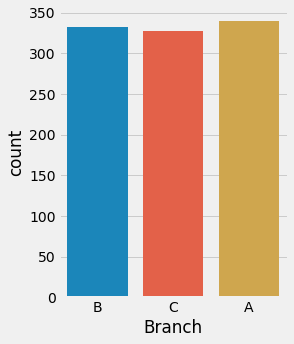

In [31]:
sns.catplot(x='Branch', data = xyz, kind= 'count', height=5, aspect=.8);

The branch with the highest sales is A

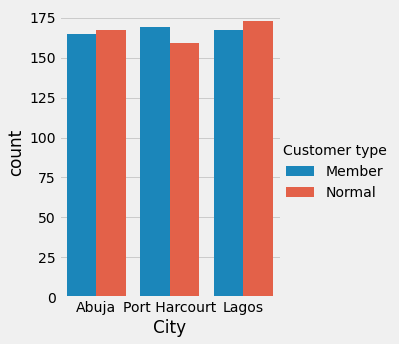

In [32]:
sns.catplot(x ='City', hue='Customer type', data = xyz, kind= 'count', height=5, aspect=.8);

#### Explore a countplot for the Payment and City Column

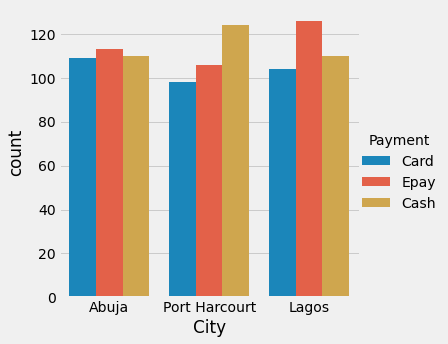

In [33]:
sns.catplot(x ='City', hue='Payment', data = xyz, kind= 'count', height=5, aspect=1);

Majority of customers at Abuja use Epay

Majority of customers at PH use Cash

Majority of customers at Lagos use Epay

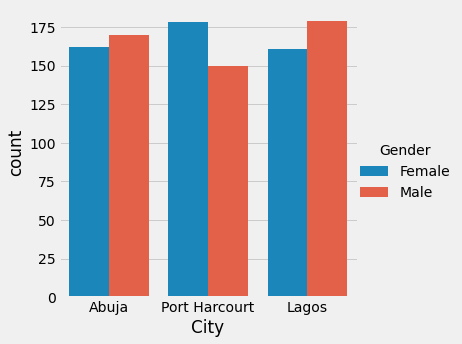

In [34]:
sns.catplot(x ='City', hue='Gender', data = xyz, kind= 'count', height=5, aspect=1);

Shows the most patronizing Gender in each City

#### Determine the highest & lowest sold product line, using Countplot 

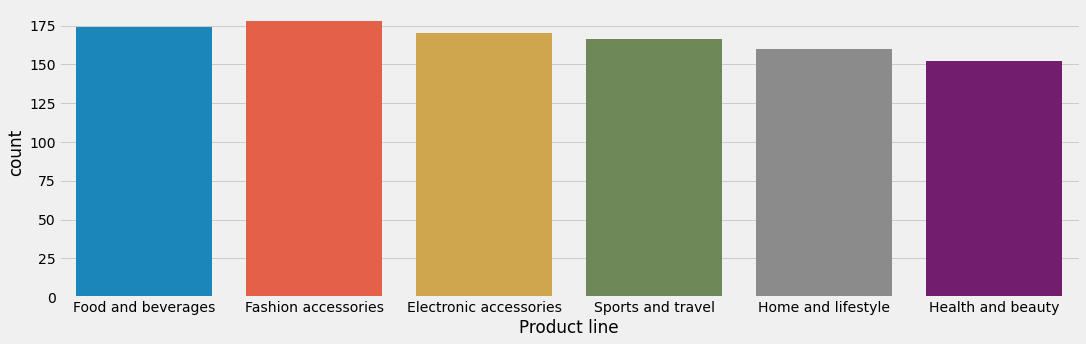

In [35]:
sns.catplot(x='Product line', data = xyz, kind= 'count', height=5, aspect=3);

Product with the highest sales is Fashion accesories

Product with the lowest sales is Health and beauty

#### Determine the Payment channel used by most customer to pay for each product line. 

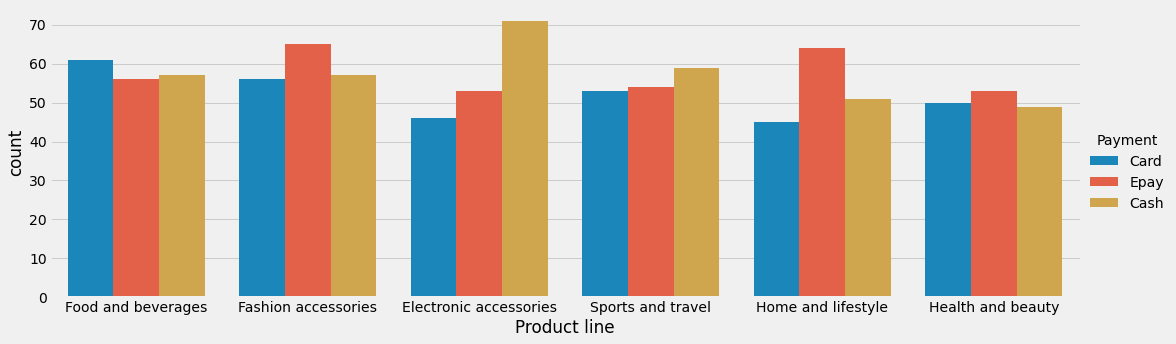

In [36]:
sns.catplot(x ='Product line', hue='Payment', data = xyz, kind='count',height=5, aspect=3);

#### Determine the Payment channel for each branch.

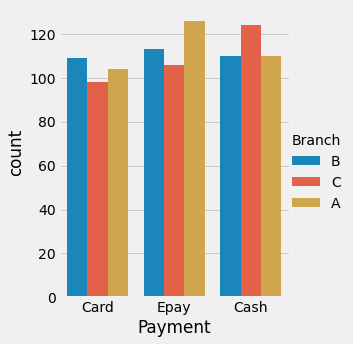

In [37]:
sns.catplot(x ='Payment', hue='Branch', data = xyz, kind= 'count', height=5, aspect=.8);

#### Determine the branch with the lowest rating. 

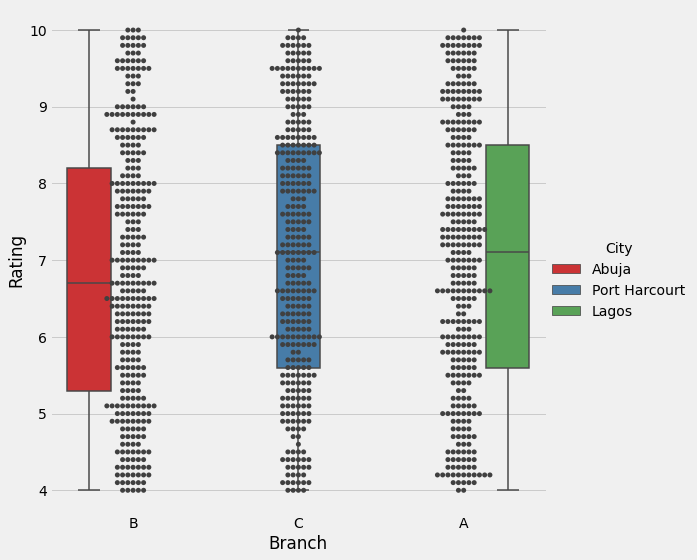

In [38]:
sns.catplot(x="Branch", y="Rating", hue= 'City', data=xyz, kind='box',height=8, linewidth=1.5, palette= 'Set1')
sns.swarmplot(x="Branch", y="Rating", data=xyz, color=".25");

In [39]:
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

fig = px.box(xyz, x="Branch", y="Rating", points= 'all',notched=True,
            title= 'Box Plot Ratings',hover_data= ['City'])
fig.show()

All the branch have the same low and high rating values

####  The gender type often affects the kind of products being purchased at the supermarket.

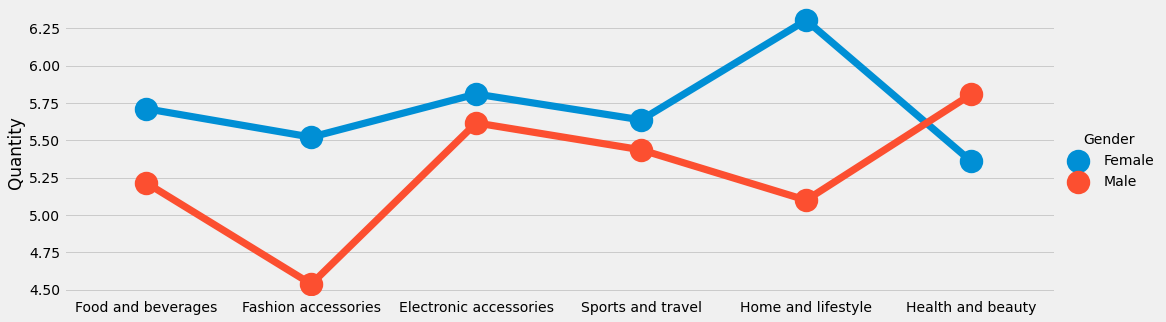

In [40]:
g = sns.catplot(x="Product line", y="Quantity", hue="Gender",
                data=xyz, kind="point", ci=None,  aspect=3)
(g.set_axis_labels("", "Quantity")
  .set_titles("{hue_name} {hue_var}"));

The graph displayed the number of quantity purchased by each gender;

Female buy more of this product (Food and beverages, Fashion accessories, Sports and travel, Home and lifestyle) than Male

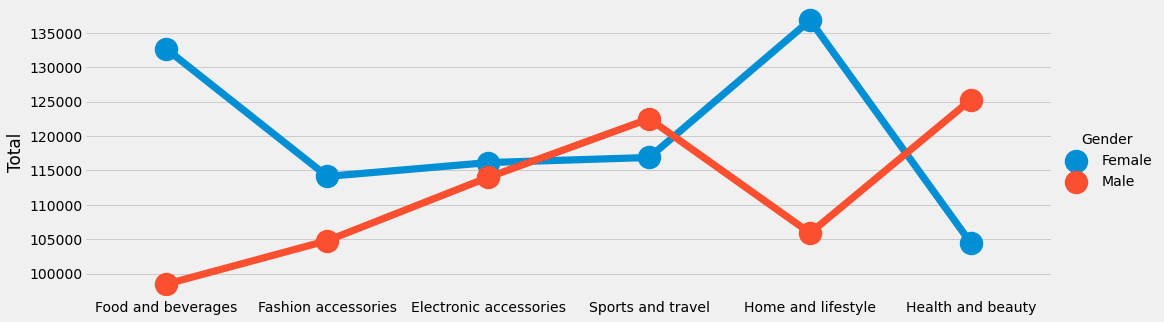

In [41]:
g = sns.catplot(x="Product line", y="Total", hue="Gender",
                data=xyz, kind="point", ci=None, aspect=3)
(g.set_axis_labels("", "Total")
  .set_titles("{hue_name} {hue_var}")
  .despine(left=True));

The total column shows a different in male purchasing the service of sports and travel than female

##### Interaction of Unit price on the Quantity of goods purchased.

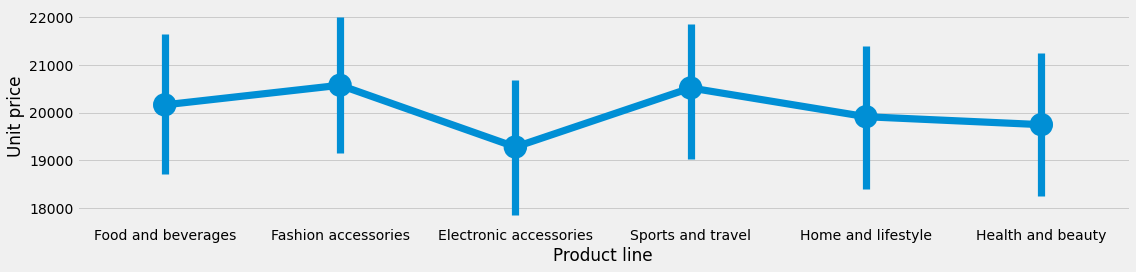

In [42]:
sns.catplot(x="Product line", y="Unit price", data=xyz, kind='point', height=4, aspect=4);

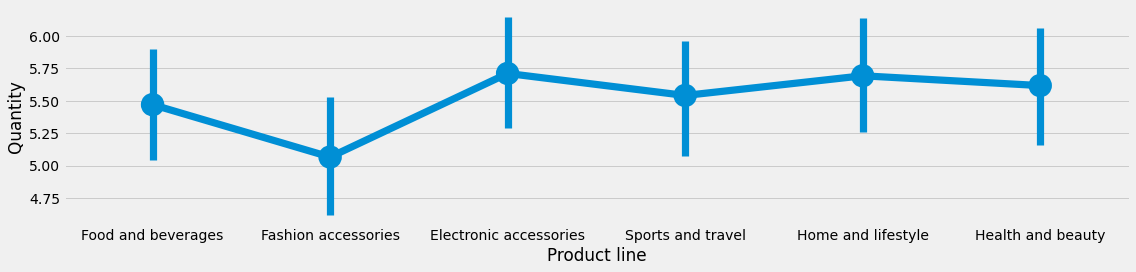

In [43]:
sns.catplot(x="Product line", y="Quantity", data=xyz, kind='point', height=4, aspect=4);

The observation here is that, low price of a product result to high quantity demand